# Prepare Dataset for Bias Analysis

In [1]:
import boto3
import sagemaker
import pandas as pd

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

/opt/conda/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


## Download Dataset Files

Let's start by retrieving a subset of the Amazon Customer Reviews dataset.

In [2]:
!aws s3 cp 's3://usd-mads-508/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv' ./data-clarify/
!aws s3 cp 's3://usd-mads-508/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv' ./data-clarify/
!aws s3 cp 's3://usd-mads-508/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Games_v1_00.tsv' ./data-clarify/

download: s3://usd-mads-508/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv to data-clarify/amazon_reviews_us_Gift_Card_v1_00.tsv
download: s3://usd-mads-508/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv to data-clarify/amazon_reviews_us_Digital_Software_v1_00.tsv
download: s3://usd-mads-508/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Games_v1_00.tsv to data-clarify/amazon_reviews_us_Digital_Video_Games_v1_00.tsv


## Import Data

In [3]:
import csv

df_giftcards = pd.read_csv(
    "./data-clarify/amazon_reviews_us_Gift_Card_v1_00.tsv",
    delimiter="\t",
    quoting=csv.QUOTE_NONE,
)
df_giftcards.shape

(149086, 15)

In [4]:
df_giftcards.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,N,Y,Five Stars,Great birthday gift for a young adult.,2015-08-31
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Gift card for the greatest selection of items ...,It's an Amazon gift card and with over 9823983...,2015-08-31
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0,N,Y,Five Stars,Good,2015-08-31
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0,N,Y,One Star,Fair,2015-08-31
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,0,0,N,Y,Five Stars,I can't believe how quickly Amazon can get the...,2015-08-31


In [5]:
import csv

df_software = pd.read_csv(
    "./data-clarify/amazon_reviews_us_Digital_Software_v1_00.tsv",
    delimiter="\t",
    quoting=csv.QUOTE_NONE,
)
df_software.shape

(102084, 15)

In [6]:
df_software.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,17747349,R2EI7QLPK4LF7U,B00U7LCE6A,106182406,CCleaner Free [Download],Digital_Software,4,0,0,N,Y,Four Stars,So far so good,2015-08-31
1,US,10956619,R1W5OMFK1Q3I3O,B00HRJMOM4,162269768,ResumeMaker Professional Deluxe 18,Digital_Software,3,0,0,N,Y,Three Stars,Needs a little more work.....,2015-08-31
2,US,13132245,RPZWSYWRP92GI,B00P31G9PQ,831433899,Amazon Drive Desktop [PC],Digital_Software,1,1,2,N,Y,One Star,Please cancel.,2015-08-31
3,US,35717248,R2WQWM04XHD9US,B00FGDEPDY,991059534,Norton Internet Security 1 User 3 Licenses,Digital_Software,5,0,0,N,Y,Works as Expected!,Works as Expected!,2015-08-31
4,US,17710652,R1WSPK2RA2PDEF,B00FZ0FK0U,574904556,SecureAnywhere Intermet Security Complete 5 De...,Digital_Software,4,1,2,N,Y,Great antivirus. Worthless customer support,I've had Webroot for a few years. It expired a...,2015-08-31


In [7]:
import csv

df_videogames = pd.read_csv(
    "./data-clarify/amazon_reviews_us_Digital_Video_Games_v1_00.tsv",
    delimiter="\t",
    quoting=csv.QUOTE_NONE,
)
df_videogames.shape

(145431, 15)

In [8]:
df_videogames.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21269168,RSH1OZ87OYK92,B013PURRZW,603406193,Madden NFL 16 - Xbox One Digital Code,Digital_Video_Games,2,2,3,N,N,A slight improvement from last year.,I keep buying madden every year hoping they ge...,2015-08-31
1,US,133437,R1WFOQ3N9BO65I,B00F4CEHNK,341969535,Xbox Live Gift Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome,2015-08-31
2,US,45765011,R3YOOS71KM5M9,B00DNHLFQA,951665344,Command & Conquer The Ultimate Collection [Ins...,Digital_Video_Games,5,0,0,N,Y,Hail to the great Yuri!,If you are prepping for the end of the world t...,2015-08-31
3,US,113118,R3R14UATT3OUFU,B004RMK5QG,395682204,Playstation Plus Subscription,Digital_Video_Games,5,0,0,N,Y,Five Stars,Perfect,2015-08-31
4,US,22151364,RV2W9SGDNQA2C,B00G9BNLQE,640460561,Saints Row IV - Enter The Dominatrix [Online G...,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome!,2015-08-31


## Visualize Data

Text(0, 0.5, 'Review Count')

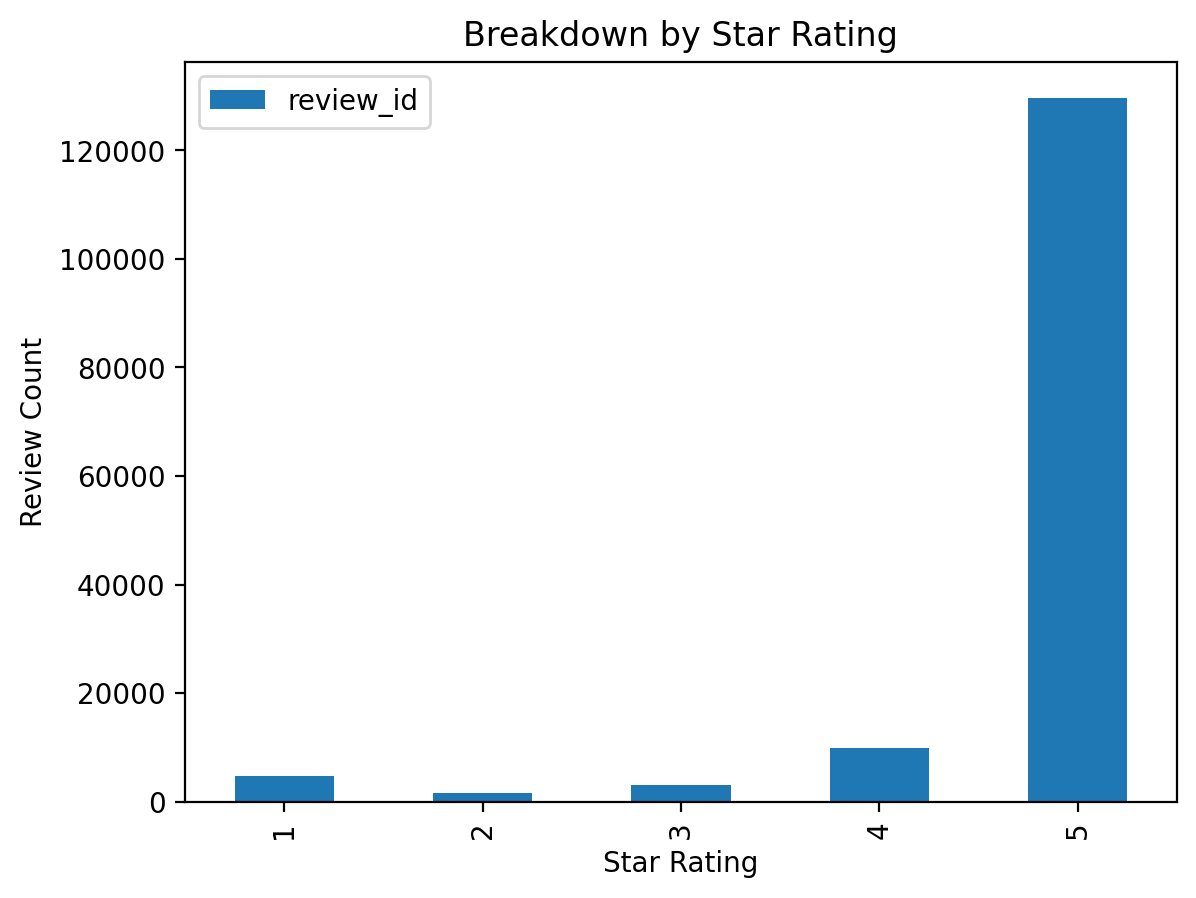

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

df_giftcards[["star_rating", "review_id"]].groupby("star_rating").count().plot(
    kind="bar", title="Breakdown by Star Rating"
)
plt.xlabel("Star Rating")
plt.ylabel("Review Count")

Text(0, 0.5, 'Review Count')

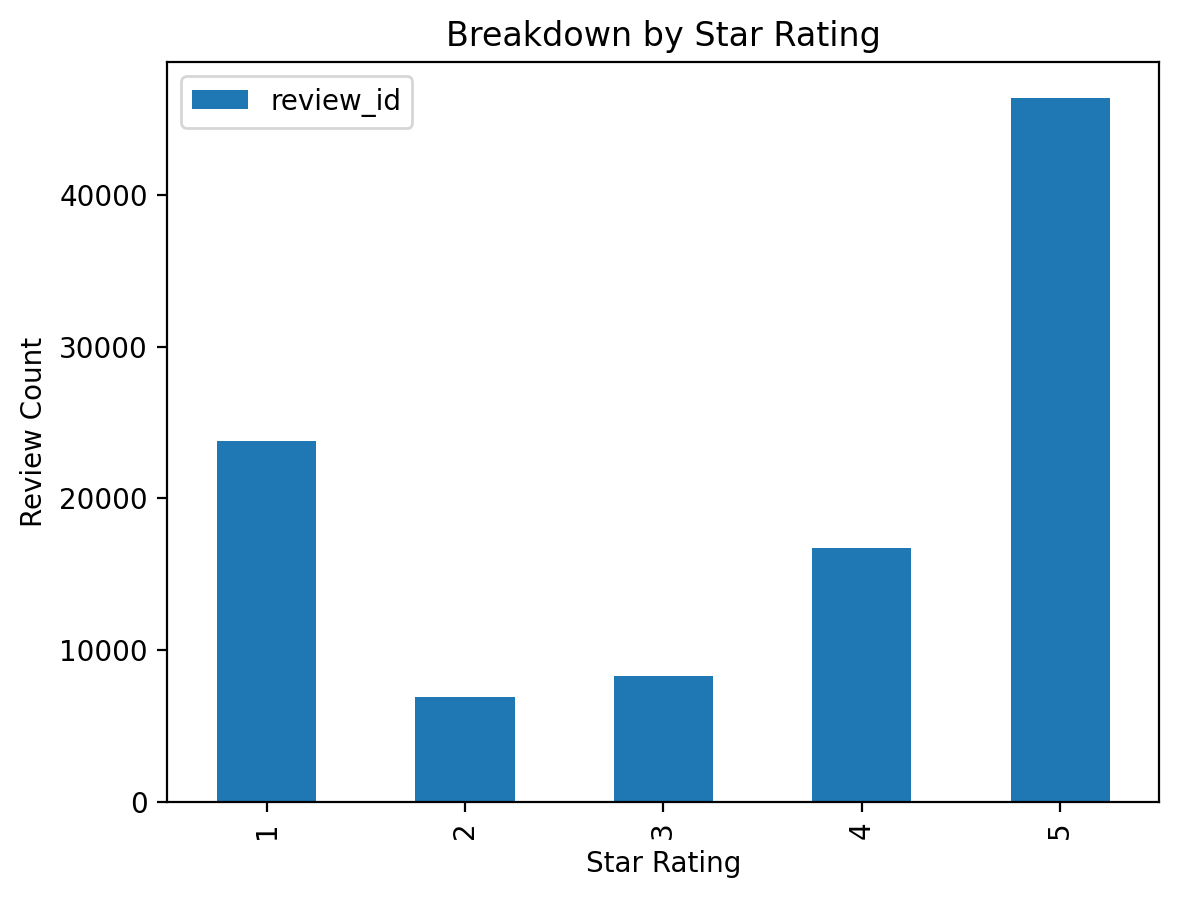

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

df_software[["star_rating", "review_id"]].groupby("star_rating").count().plot(
    kind="bar", title="Breakdown by Star Rating"
)
plt.xlabel("Star Rating")
plt.ylabel("Review Count")

Text(0, 0.5, 'Review Count')

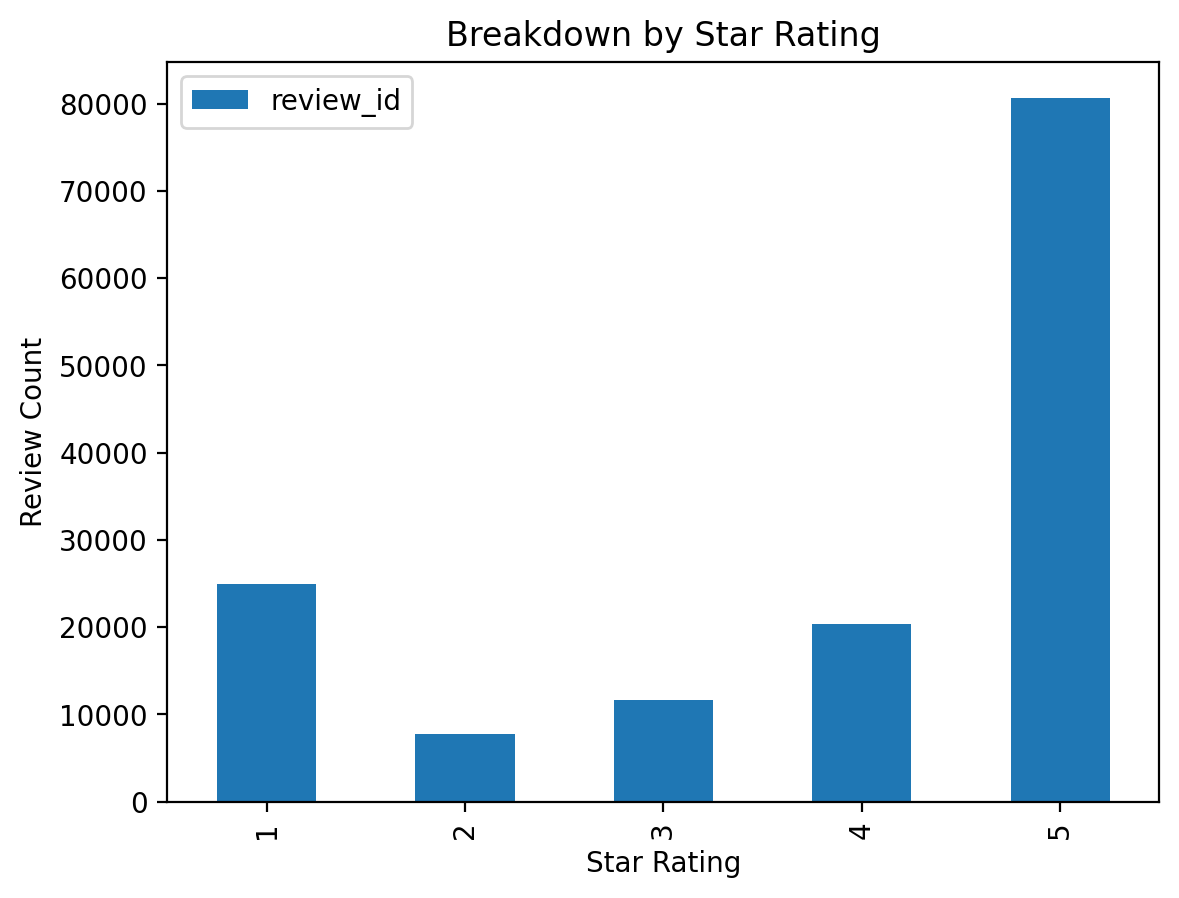

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

df_videogames[["star_rating", "review_id"]].groupby("star_rating").count().plot(
    kind="bar", title="Breakdown by Star Rating"
)
plt.xlabel("Star Rating")
plt.ylabel("Review Count")

# Combine Data Frames

In [12]:
df_giftcards.shape

(149086, 15)

In [13]:
df_software.shape

(102084, 15)

In [14]:
df_videogames.shape

(145431, 15)

In [15]:
df = pd.concat([df_giftcards, df_software, df_videogames], ignore_index=True, sort=False)

In [16]:
df.shape

(396601, 15)

In [17]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,N,Y,Five Stars,Great birthday gift for a young adult.,2015-08-31
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Gift card for the greatest selection of items ...,It's an Amazon gift card and with over 9823983...,2015-08-31
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0,N,Y,Five Stars,Good,2015-08-31
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0,N,Y,One Star,Fair,2015-08-31
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,0,0,N,Y,Five Stars,I can't believe how quickly Amazon can get the...,2015-08-31


[03/16/25 05:58:15] INFO     Using categorical units to plot a list of strings that are all         ]8;id=311542;file:///opt/conda/lib/python3.11/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=482699;file:///opt/conda/lib/python3.11/site-packages/matplotlib/category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

[03/16/25 05:58:16] INFO     Using categorical units to plot a list of strings that are all         ]8;id=295473;file:///opt/conda/lib/python3.11/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=548491;file:///opt/conda/lib/python3.11/site-packages/matplotlib/category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

<Axes: xlabel='star_rating', ylabel='count'>

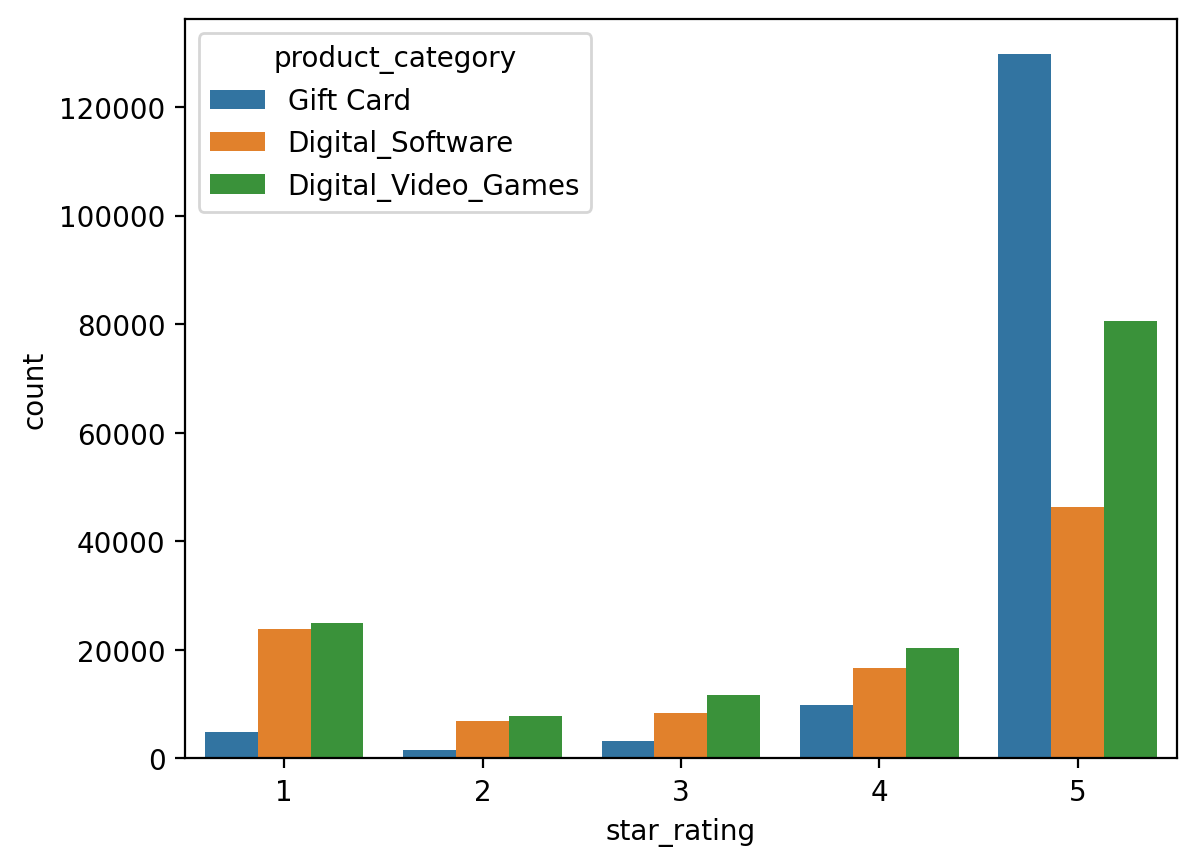

In [18]:
import seaborn as sns

sns.countplot(data=df, x="star_rating", hue="product_category")

# Balance the Dataset by Product Category and Star Rating

In [19]:
df_grouped_by = df.groupby(["product_category", "star_rating"])[["product_category", "star_rating"]]
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced.shape

(23535, 2)

                    INFO     Using categorical units to plot a list of strings that are all         ]8;id=325419;file:///opt/conda/lib/python3.11/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=666765;file:///opt/conda/lib/python3.11/site-packages/matplotlib/category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

                    INFO     Using categorical units to plot a list of strings that are all         ]8;id=175590;file:///opt/conda/lib/python3.11/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=770365;file:///opt/conda/lib/python3.11/site-packages/matplotlib/category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

<Axes: xlabel='star_rating', ylabel='count'>

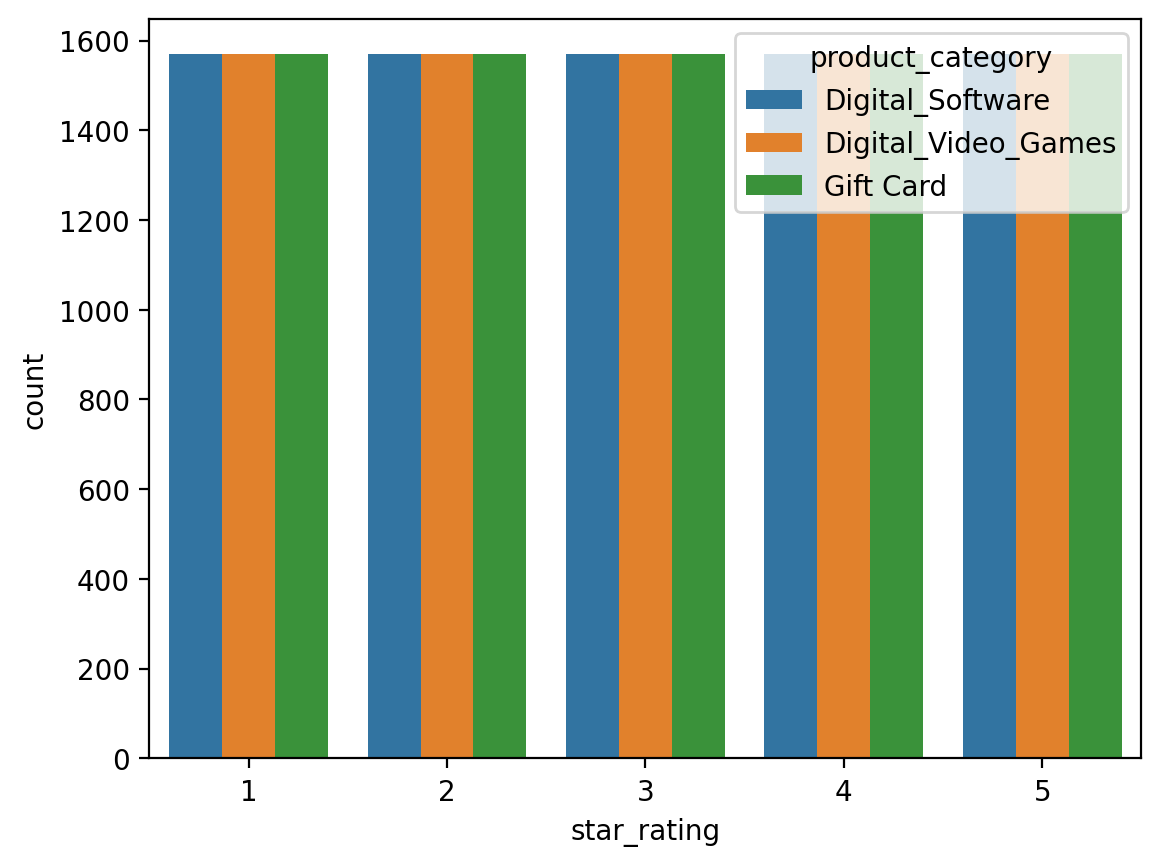

In [20]:
import seaborn as sns

sns.countplot(data=df_balanced, x="star_rating", hue="product_category")

# Write a CSV with Header

## Unbalanced label classes

In [21]:
df.shape

(396601, 15)

In [22]:
path = "./data-clarify/amazon_reviews_us_giftcards_software_videogames.csv"
df.to_csv(path, index=False, header=True)

## Balanced label classes

In [23]:
df_balanced.shape

(23535, 2)

In [24]:
path_balanced = "./data-clarify/amazon_reviews_us_giftcards_software_videogames_balanced.csv"
df_balanced.to_csv(path_balanced, index=False, header=True)

# Write as JSONLINES

In [25]:
path_jsonlines = "./data-clarify/amazon_reviews_us_giftcards_software_videogames_balanced.jsonl"
df_balanced.to_json(path_or_buf=path_jsonlines, orient="records", lines=True)

# Upload Train Data to S3

In [26]:
import time

timestamp = int(time.time())

bias_data_s3_uri = sess.upload_data(bucket=bucket, key_prefix="bias-detection-{}".format(timestamp), path=path)
bias_data_s3_uri

's3://sagemaker-us-east-1-786782285170/bias-detection-1742104701/amazon_reviews_us_giftcards_software_videogames.csv'

In [27]:
!aws s3 ls $bias_data_s3_uri

2025-03-16 05:58:22  167441082 amazon_reviews_us_giftcards_software_videogames.csv


In [28]:
balanced_bias_data_s3_uri = sess.upload_data(
    bucket=bucket, key_prefix="bias-detection-{}".format(timestamp), path=path_balanced
)
balanced_bias_data_s3_uri

's3://sagemaker-us-east-1-786782285170/bias-detection-1742104701/amazon_reviews_us_giftcards_software_videogames_balanced.csv'

In [29]:
!aws s3 ls $balanced_bias_data_s3_uri

2025-03-16 05:58:23     415814 amazon_reviews_us_giftcards_software_videogames_balanced.csv


In [30]:
balanced_bias_data_jsonlines_s3_uri = sess.upload_data(
    bucket=bucket, key_prefix="bias-detection-{}".format(timestamp), path=path_jsonlines
)
balanced_bias_data_jsonlines_s3_uri

's3://sagemaker-us-east-1-786782285170/bias-detection-1742104701/amazon_reviews_us_giftcards_software_videogames_balanced.jsonl'

In [31]:
!aws s3 ls $balanced_bias_data_jsonlines_s3_uri

2025-03-16 05:58:24    1286580 amazon_reviews_us_giftcards_software_videogames_balanced.jsonl


# Store Variables for Next Notebook(s)

In [32]:
%store balanced_bias_data_jsonlines_s3_uri

Stored 'balanced_bias_data_jsonlines_s3_uri' (str)


In [33]:
%store balanced_bias_data_s3_uri

Stored 'balanced_bias_data_s3_uri' (str)


In [34]:
%store bias_data_s3_uri

Stored 'bias_data_s3_uri' (str)


In [35]:
%store

Stored variables and their in-db values:
balanced_bias_data_jsonlines_s3_uri                   -> 's3://sagemaker-us-east-1-786782285170/bias-detect
balanced_bias_data_s3_uri                             -> 's3://sagemaker-us-east-1-786782285170/bias-detect
bias_data_s3_uri                                      -> 's3://sagemaker-us-east-1-786782285170/bias-detect
ingest_create_athena_db_passed                        -> True
ingest_create_athena_table_parquet_passed             -> True
ingest_create_athena_table_tsv_passed                 -> True
s3_private_path_tsv                                   -> 's3://sagemaker-us-east-1-786782285170/amazon-revi
s3_public_path_tsv                                    -> 's3://usd-mads-508/amazon-reviews-pds/tsv'
setup_dependencies_passed                             -> True
setup_iam_roles_passed                                -> True
setup_instance_check_passed                           -> True
setup_s3_bucket_passed                                -

# Release Resources


In [36]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [37]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}

<IPython.core.display.Javascript object>